# Manipulating DataFrames with pandas
- William Surles
- 2017-10-31
- Data camp course
- [https://www.datacamp.com/courses/manipulating-dataframes-with-pandas](https://www.datacamp.com/courses/manipulating-dataframes-with-pandas)

## Whats Covered
- Extracting and transforming data
 - Indexing DataFrames
 - Slicing DataFrames
 - Filtering DataFrames
 - Transforming DataFrames
- Advanced indexing
 - Index objects and labeled data
 - Hierarchical indexing
- Rearranging and reshaping data
 - Pivoting DataFrames
 - Stacking and unstacking Datafraes
 - Melting DataFrames
 - Pivot Tables
- Grouping data
 - Categoricals and groupby
 - Groupby and aggregation
 - Groupby and filtering
- Brining it all together
 - Case Study - Summer Olympics
 - Understanding the column labels
 - Constructing alternative county rankings
 - Reshaping DataFrames for visualization

## Aditional Resources

## Libraries and Data

In [496]:
import pandas as pd
import numpy as np
from numpy import nan
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Extracting and transforming data

## Indexing DataFrames

#### Get the sales data

In [140]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/sales.csv'
sales = pd.read_csv(file, index_col = 'month')
sales

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


#### Simple indexing with square brackets
- This is similar to indexing python lists and numpy arrays

In [141]:
sales['salt']['Jan']

12.0

#### Using column attribite and row label
- column labels can be refered to as attributes of the df if the labels are valid python identifiers

In [142]:
sales.eggs['Mar']

221

#### Using the .loc accesor
- This is more efficent and more programtically reusable
- `.loc` uses labels
- `.iloc` uses index positions
- these are given as [row, column]

In [13]:
sales.loc['May','spam']

52

In [15]:
sales.iloc[4,2]

52

#### Selecting only some columns
- When using bracket indexing without .loc the value returned can be an individual value, a pandas series, or a pandas dataframe. yikes
- To ensure you get a dataframe back use double brackets `[['stuff']]` (This is a nested list)

In [143]:
sales_new = sales[['salt','eggs']]
sales_new

,salt,eggs
month,,
Jan,12.0,47
Feb,50.0,110
Mar,89.0,221
Apr,87.0,77
May,NaN,132
Jun,60.0,205


### Index ordering

In [24]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/pennsylvania2012_turnout.csv'
election = pd.read_csv(file, index_col = 'county')
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118


In [25]:
election.loc['Bedford','winner']

'Romney'

### Positional and labeled indexing

In [26]:
# Assign the row position of election.loc['Bedford']: x
x = 4

# Assign the column position of election['winner']: y
y = 4

# Print the boolean equivalence
print(election.iloc[x, y] == election.loc['Bedford', 'winner'])


True


### Indexing and column rearrangement

In [28]:
# Create a separate dataframe with the columns ['winner', 'total', 'voters']: results
results = election[['winner', 'total', 'voters']]

# Print the output of results.head()
print(results.head())

           winner   total  voters
county                           
Adams      Romney   41973   61156
Allegheny   Obama  614671  924351
Armstrong  Romney   28322   42147
Beaver     Romney   80015  115157
Bedford    Romney   21444   32189


## Slicing DataFrames

#### Selecting a column

In [29]:
sales['eggs']

month
Jan     47
Feb    110
Mar    221
Apr     77
May    132
Jun    205
Name: eggs, dtype: int64

In [30]:
type(sales['eggs'])

pandas.core.series.Series

#### Slicing and indexing a Series

In [32]:
sales['eggs'][1:4]

month
Feb    110
Mar    221
Apr     77
Name: eggs, dtype: int64

In [33]:
sales['eggs'][4]

132

#### Using .loc[ ]
- this can use a label range. 
- The right endpoint will be included, thankfully!

In [36]:
sales.loc[:, 'eggs':'salt']

,eggs,salt
month,,
Jan,47,12.0
Feb,110,50.0
Mar,221,89.0
Apr,77,87.0
May,132,NaN
Jun,205,60.0


In [37]:
sales.loc['Jan':'Apr',:]

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20


In [39]:
sales.loc['Mar':'May','salt':'spam']

,salt,spam
month,,
Mar,89.0,72
Apr,87.0,20
May,NaN,52


#### Using .iloc[ ]

In [40]:
sales.iloc[2:5, 1:]

,salt,spam
month,,
Mar,89.0,72
Apr,87.0,20
May,NaN,52


#### Using lists rather than slices

In [41]:
sales.loc['Jan':'May',['eggs','spam']]

,eggs,spam
month,,
Jan,47,17
Feb,110,31
Mar,221,72
Apr,77,20
May,132,52


- Remember with `.iloc` the right endpoint is not included

In [42]:
sales.iloc[[0,4,5],0:2]

,eggs,salt
month,,
Jan,47,12.0
May,132,NaN
Jun,205,60.0


#### Series versus 1-column DataFrame

In [43]:
# A Series by column name
type(sales['eggs'])

pandas.core.series.Series

In [44]:
# A DataFrame w/ single column

In [45]:
type(sales[['eggs']])

pandas.core.frame.DataFrame

### Slicing rows

In [49]:
# Slice the row labels 'Perry' to 'Potter': p_counties
p_counties = election.loc['Perry':'Potter']

# Print the p_counties DataFrame
p_counties

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Perry,PA,18240,29.769737,68.591009,Romney,27245,66.948064,38.821272
Philadelphia,PA,653598,85.224251,14.051451,Obama,1099197,59.461407,71.172800
Pike,PA,23164,43.904334,54.882576,Romney,41840,55.363289,10.978242
Potter,PA,7205,26.259542,72.158223,Romney,10913,66.022175,45.898681


In [50]:
# Slice the row labels 'Potter' to 'Perry' in reverse order: p_counties_rev
p_counties_rev = election.loc['Potter':'Perry':-1]

# Print the p_counties_rev DataFrame
p_counties_rev

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Potter,PA,7205,26.259542,72.158223,Romney,10913,66.022175,45.898681
Pike,PA,23164,43.904334,54.882576,Romney,41840,55.363289,10.978242
Philadelphia,PA,653598,85.224251,14.051451,Obama,1099197,59.461407,71.172800
Perry,PA,18240,29.769737,68.591009,Romney,27245,66.948064,38.821272


### Slicing columns

In [51]:
# Slice the columns from the starting column to 'Obama': left_columns
left_columns = election.loc[:,:'Obama']

# Print the output of left_columns.head()
left_columns.head()

,state,total,Obama
county,,,
Adams,PA,41973,35.482334
Allegheny,PA,614671,56.640219
Armstrong,PA,28322,30.696985
Beaver,PA,80015,46.032619
Bedford,PA,21444,22.057452


In [52]:
# Slice the columns from 'Obama' to 'winner': middle_columns
middle_columns = election.loc[:,'Obama':'winner']

# Print the output of middle_columns.head()
middle_columns.head()

,Obama,Romney,winner
county,,,
Adams,35.482334,63.112001,Romney
Allegheny,56.640219,42.185820,Obama
Armstrong,30.696985,67.901278,Romney
Beaver,46.032619,52.637630,Romney
Bedford,22.057452,76.986570,Romney


In [53]:
# Slice the columns from 'Romney' to the end: 'right_columns'
right_columns = election.loc[:,'Romney':]

# Print the output of right_columns.head()
right_columns.head()

,Romney,winner,voters,turnout,margin
county,,,,,
Adams,63.112001,Romney,61156,68.632677,27.629667
Allegheny,42.185820,Obama,924351,66.497575,14.454399
Armstrong,67.901278,Romney,42147,67.198140,37.204293
Beaver,52.637630,Romney,115157,69.483401,6.605012
Bedford,76.986570,Romney,32189,66.619031,54.929118


### Subselecting DataFrames with lists

In [54]:
# Create the list of row labels: rows
rows = ['Philadelphia', 'Centre', 'Fulton']

# Create the list of column labels: cols
cols = ['winner','Obama','Romney']

# Create the new DataFrame: three_counties
three_counties = election.loc[rows, cols]

# Print the three_counties DataFrame
three_counties

,winner,Obama,Romney
county,,,
Philadelphia,Obama,85.224251,14.051451
Centre,Romney,48.948416,48.977486
Fulton,Romney,21.096291,77.748861


## Filtering DataFrames

#### Creating a boolean series

In [55]:
sales.salt > 60

month
Jan    False
Feb    False
Mar     True
Apr     True
May    False
Jun    False
Name: salt, dtype: bool

#### Filtering with a boolean series
- You can filter directly with a logical expression or assing the boolean series to a variable

In [56]:
sales[sales.salt > 60]

,eggs,salt,spam
month,,,
Mar,221,89.0,72
Apr,77,87.0,20


In [57]:
enough_salt_sold = sales.salt > 60

sales[enough_salt_sold]

,eggs,salt,spam
month,,,
Mar,221,89.0,72
Apr,77,87.0,20


#### Combining filters
- Parens are used to force order of logical operations

In [59]:
sales[(sales.salt >= 50) & (sales.eggs < 200)]

,eggs,salt,spam
month,,,
Feb,110,50.0,31
Apr,77,87.0,20


In [61]:
sales[(sales.salt >= 50) | (sales.eggs < 200)]

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


#### DataFrames with zero and NaNs

In [64]:
sales2 = sales.copy()
sales2['bacon'] = [0, 0, 50, 60, 70, 80]
sales2

,eggs,salt,spam,bacon
month,,,,
Jan,47,12.0,17,0
Feb,110,50.0,31,0
Mar,221,89.0,72,50
Apr,77,87.0,20,60
May,132,NaN,52,70
Jun,205,60.0,55,80


#### Select columns with all nonzeros

In [66]:
sales2.loc[:, sales2.all()]

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


#### Select columns with any nonzeros

In [67]:
sales2.loc[:, sales2.any()]

,eggs,salt,spam,bacon
month,,,,
Jan,47,12.0,17,0
Feb,110,50.0,31,0
Mar,221,89.0,72,50
Apr,77,87.0,20,60
May,132,NaN,52,70
Jun,205,60.0,55,80


#### Select columns with any NaNs

In [68]:
sales.loc[:, sales.isnull().any()]

,salt
month,
Jan,12.0
Feb,50.0
Mar,89.0
Apr,87.0
May,NaN
Jun,60.0


#### Select columns without NaNs

In [69]:
sales.loc[:, sales.notnull().all()]

,eggs,spam
month,,
Jan,47,17
Feb,110,31
Mar,221,72
Apr,77,20
May,132,52
Jun,205,55


#### Drop rows with any NaNs

In [70]:
sales.dropna(how = 'any')

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
Jun,205,60.0,55


#### Filtering a column based on another

In [71]:
sales.eggs[sales.salt > 55]

month
Mar    221
Apr     77
Jun    205
Name: eggs, dtype: int64

#### Modifying a column based on another
- Lets say a few eggs are throw in for free with every large salt sale...

In [74]:
sales.eggs[sales.salt > 55] += 5
sales

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,231,89.0,72
Apr,87,87.0,20
May,132,NaN,52
Jun,215,60.0,55


### Thresholding data

In [75]:
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118


In [76]:
# Create the boolean array: high_turnout
high_turnout = election.turnout > 70

# Filter the election DataFrame with the high_turnout array: high_turnout_df
high_turnout_df = election[high_turnout]

# Print the high_turnout_results DataFrame
print(high_turnout_df)

             state   total      Obama     Romney  winner  voters    turnout  \
county                                                                        
Bucks           PA  319407  49.966970  48.801686   Obama  435606  73.324748   
Butler          PA   88924  31.920516  66.816607  Romney  122762  72.436096   
Chester         PA  248295  49.228539  49.650617  Romney  337822  73.498766   
Forest          PA    2308  38.734835  59.835355  Romney    3232  71.410891   
Franklin        PA   62802  30.110506  68.583803  Romney   87406  71.850903   
Montgomery      PA  401787  56.637223  42.286834   Obama  551105  72.905708   
Westmoreland    PA  168709  37.567646  61.306154  Romney  238006  70.884347   

                 margin  
county                   
Bucks          1.165284  
Butler        34.896091  
Chester        0.422079  
Forest        21.100520  
Franklin      38.473297  
Montgomery    14.350390  
Westmoreland  23.738508  


### Filtering columns using other columns

In [78]:
# Create the boolean array: too_close
too_close = election.margin < 1

# Assign np.nan to the 'winner' column where the results were too close to call
election.winner[too_close] = np.nan

# Print the output of election.info()
print(election.info())


<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
state      67 non-null object
total      67 non-null int64
Obama      67 non-null float64
Romney     67 non-null float64
winner     64 non-null object
voters     67 non-null int64
turnout    67 non-null float64
margin     67 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 7.2+ KB
None


### Filtering using NaNs
- We will use `dropna()` with 'any' and 'all' to filter the data
- We will also use `thresh=1000` to select columns with at least 1k non null values

In [88]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/titanic.csv'
titanic = pd.read_csv(file)

In [90]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB
None


In [91]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [92]:
# Select the 'age' and 'cabin' columns: df
df = titanic.loc[:,['age','cabin']]

# Print the shape of df
print(df.shape)

df.head(20)

(1309, 2)


,age,cabin
0,29.00,B5
1,0.92,C22 C26
2,2.00,C22 C26
3,30.00,C22 C26
4,25.00,C22 C26
5,48.00,E12
6,63.00,D7
7,39.00,A36
8,53.00,C101
9,71.00,NaN


In [93]:
# Drop rows in df with how='any' and print the shape
print(df.dropna(how='any').shape)

(272, 2)


In [94]:
# Drop rows in df with how='all' and print the shape
print(df.dropna(how = 'all').shape)

(1069, 2)


In [95]:
# Call .dropna() with thresh=1000 and axis='columns' and print the output of .info() from titanic
print(titanic.dropna(thresh=1000, axis='columns').info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB
None


## Transforming DataFrames

- the best way to transform a data frame is with a pandas dataframe method
- the second best way is to use numpy universal functions (ufuncs)

#### Dataframe vectorized methods
- this will apply a function over the entire dataframe

In [97]:
sales

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,231,89.0,72
Apr,87,87.0,20
May,132,NaN,52
Jun,215,60.0,55


In [98]:
# convert count to dozens. This rounds down.
sales.floordiv(12)

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,19,7.0,6
Apr,7,7.0,1
May,11,NaN,4
Jun,17,5.0,4


#### NumPy vectorized functions

In [99]:
np.floor_divide(sales, 12)

,eggs,salt,spam
month,,,
Jan,3.0,1.0,1.0
Feb,9.0,4.0,2.0
Mar,19.0,7.0,6.0
Apr,7.0,7.0,1.0
May,11.0,NaN,4.0
Jun,17.0,5.0,4.0


#### Plain python functions

In [103]:
# Reusable python function
def dozens(n):
    """Divide by 12 and round down"""
    return n//12

sales.apply(dozens)

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,19,7.0,6
Apr,7,7.0,1
May,11,NaN,4
Jun,17,5.0,4


In [104]:
# throw away python function (lambda)
sales.apply(lambda n: n//12)

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,19,7.0,6
Apr,7,7.0,1
May,11,NaN,4
Jun,17,5.0,4


#### Storing a transformation

In [105]:
sales['dozens_of_eggs'] = sales.eggs.floordiv(12)
sales

,eggs,salt,spam,dozens_of_eggs
month,,,,
Jan,47,12.0,17,3
Feb,110,50.0,31,9
Mar,231,89.0,72,19
Apr,87,87.0,20,7
May,132,NaN,52,11
Jun,215,60.0,55,17


#### Working with string values
- We can use the `str` method to access strings

In [106]:
sales.index = sales.index.str.upper()
sales

,eggs,salt,spam,dozens_of_eggs
month,,,,
JAN,47,12.0,17,3
FEB,110,50.0,31,9
MAR,231,89.0,72,19
APR,87,87.0,20,7
MAY,132,NaN,52,11
JUN,215,60.0,55,17


- Unfortunately when working with the index we have to use `map` rather than `apply`
- We can map a defined or a custom transformation using `map`

In [107]:
sales.index = sales.index.map(str.lower)
sales

,eggs,salt,spam,dozens_of_eggs
month,,,,
jan,47,12.0,17,3
feb,110,50.0,31,9
mar,231,89.0,72,19
apr,87,87.0,20,7
may,132,NaN,52,11
jun,215,60.0,55,17


#### Defining columns using other columns

In [109]:
sales['salty_eggs'] = sales.salt + sales.dozens_of_eggs
sales

,eggs,salt,spam,dozens_of_eggs,salty_eggs
month,,,,,
jan,47,12.0,17,3,15.0
feb,110,50.0,31,9,59.0
mar,231,89.0,72,19,108.0
apr,87,87.0,20,7,94.0
may,132,NaN,52,11,NaN
jun,215,60.0,55,17,77.0


### Using apply() to transform a column

In [111]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/pittsburgh2013.csv'
weather = pd.read_csv(file)
weather.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,Mean Dew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2013-1-1,32,28,21,30,27,16,100,89,77,...,10,6,2,10,8,NaN,0.00,8,Snow,277
1,2013-1-2,25,21,17,14,12,10,77,67,55,...,10,10,10,14,5,NaN,0.00,4,NaN,272
2,2013-1-3,32,24,16,19,15,9,77,67,56,...,10,10,10,17,8,26.0,0.00,3,NaN,229
3,2013-1-4,30,28,27,21,19,17,75,68,59,...,10,10,6,23,16,32.0,0.00,4,NaN,250
4,2013-1-5,34,30,25,23,20,16,75,68,61,...,10,10,10,16,10,23.0,0.21,5,NaN,221


In [112]:
# Write a function to convert degrees Fahrenheit to degrees Celsius: to_celsius
def to_celsius(F):
    return 5/9*(F - 32)

# Apply the function over 'Mean TemperatureF' and 'Mean Dew PointF': df_celsius
df_celsius = weather[['Mean TemperatureF', 'Mean Dew PointF']].apply(to_celsius)

# Reassign the columns df_celsius
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

# Print the output of df_celsius.head()
print(df_celsius.head())

   Mean TemperatureC  Mean Dew PointC
0          -2.222222        -2.777778
1          -6.111111       -11.111111
2          -4.444444        -9.444444
3          -2.222222        -7.222222
4          -1.111111        -6.666667


### Using .map() with a dictionary
- The .map() method is used to transform values according to a Python dictionary look-up.

In [113]:
# Create the dictionary: red_vs_blue
red_vs_blue = {'Obama':'blue', 'Romney':'red'}

# Use the dictionary to map the 'winner' column to the new column: election['color']
election['color'] = election.winner.map(red_vs_blue)

# Print the output of election.head()
print(election.head())


          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  
county                      
Adams      27.629667   red  
Allegheny  14.454399  blue  
Armstrong  37.204293   red  
Beaver      6.605012   red  
Bedford    54.929118   red  


### Using vectorized functions

- When performance is paramount, you should avoid using .apply() and .map() because those constructs perform Python for-loops over the data stored in a pandas Series or DataFrame. 
- By using vectorized functions instead, you can loop over the data at the same speed as compiled code (C, Fortran, etc.)! 
- NumPy, SciPy and pandas come with a variety of vectorized functions (called Universal Functions or UFuncs in NumPy).
- You can write your own vectorized functions, but here we will just focus on the ones distributed by numpy and pandas
- Instead of using `.apply()` as you did in the earlier exercises, the `zscore` UFunc will take a pandas Series as input and return a NumPy array. 

In [115]:
# Call zscore with election['turnout'] as input: turnout_zscore
turnout_zscore = zscore(election['turnout'])

# Print the type of turnout_zscore
print(type(turnout_zscore))

<class 'numpy.ndarray'>


In [116]:
# Assign turnout_zscore to a new column: election['turnout_zscore']
election['turnout_zscore'] = turnout_zscore

# Print the output of election.head()
print(election.head())

          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  turnout_zscore  
county                                      
Adams      27.629667   red        0.853734  
Allegheny  14.454399  blue        0.439846  
Armstrong  37.204293   red        0.575650  
Beaver      6.605012   red        1.018647  
Bedford    54.929118   red        0.463391  


# Advanced indexing

## Index objects and labeled data

#### pandas Data Structures
- Key Building blocks
 - Indexes: Sequence of labels
 - Series: 1D array with index
 - DataFrames: 2D array with Series as columns
- Indexes
 - Immutable (like ditionary keys)
 - Homogenous in data type (like numpy arrays)

#### Creating a Series

In [117]:
prices = [10.70, 10.86, 10.74, 10.71, 10.79]
shares = pd.Series(prices)
print(shares)

0    10.70
1    10.86
2    10.74
3    10.71
4    10.79
dtype: float64


#### Creating an index

In [118]:
days = ['Mon','Tues','Wed','Thurs','Fri']
shares = pd.Series(prices, index=days)
print(shares)

Mon      10.70
Tues     10.86
Wed      10.74
Thurs    10.71
Fri      10.79
dtype: float64


#### Examining an index
- We can index and slice into the index just as we can with a python list

In [119]:
print(shares.index)
print('----------------')
print(shares.index[2])
print('----------------')
print(shares.index[:2])
print('----------------')
print(shares.index[-2:])
print('----------------')
print(shares.index.name)

Index(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri'], dtype='object')
----------------
Wed
----------------
Index(['Mon', 'Tues'], dtype='object')
----------------
Index(['Thurs', 'Fri'], dtype='object')
----------------
None


#### Modifying index name

In [121]:
shares.index.name = 'weekday'
print(shares)

weekday
Mon      10.70
Tues     10.86
Wed      10.74
Thurs    10.71
Fri      10.79
dtype: float64


#### Modifying index entries
- Nope, these are immutable
- This helps pandas optimize on operations

In [122]:
shares.index[2] = 'Wednesday'

TypeError: Index does not support mutable operations

In [123]:
shares.index[:4] = ['Monday','Tuesday','Wednesday','Thursday']

TypeError: Index does not support mutable operations

- But you can override the entire index all at once. 
- This will drop the index name as it is a reset basically

In [124]:
shares.index = ['Monday','Tuesday','Wednesday','Thursday','Friday']
print(shares)

Monday       10.70
Tuesday      10.86
Wednesday    10.74
Thursday     10.71
Friday       10.79
dtype: float64


#### Unemployment data
- by default we have a range index of integers

In [125]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/Unemployment.csv'
unemployment = pd.read_csv(file)
unemployment.head()

,Zip,unemployment,participants
0,1001,0.06,13801
1,1002,0.09,24551
2,1003,0.17,11477
3,1005,0.10,4086
4,1007,0.05,11362


In [126]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 3 columns):
Zip             33120 non-null int64
unemployment    32556 non-null float64
participants    33120 non-null int64
dtypes: float64(1), int64(2)
memory usage: 776.3 KB


#### Assigning the index
- It makes more sense to use the zip as the index, since that is the row identifier

In [127]:
unemployment.index = unemployment['Zip']
unemployment.head()

,Zip,unemployment,participants
Zip,,,
1001,1001,0.06,13801
1002,1002,0.09,24551
1003,1003,0.17,11477
1005,1005,0.10,4086
1007,1007,0.05,11362


In [128]:
# Now remove the redundant column using del
del unemployment['Zip']
unemployment.head(3)

,unemployment,participants
Zip,,
1001,0.06,13801
1002,0.09,24551
1003,0.17,11477


#### Examining index & columns

In [130]:
# index details
print(unemployment.index)

Int64Index([1001, 1002, 1003, 1005, 1007, 1008, 1009, 1010, 1011, 1012,
            ...
             966,  968,  969,  971,  976,  979,  982,  983,  985,  987],
           dtype='int64', name='Zip', length=33120)


In [131]:
# index name
print(unemployment.index.name)

Zip


In [132]:
# index type
print(type(unemployment.index))

<class 'pandas.core.indexes.numeric.Int64Index'>


In [133]:
# the columns of the df are also an index
print(unemployment.columns)

Index(['unemployment', 'participants'], dtype='object')


#### read_csv() with index_col
- If you can, just set the index right from the start as you read in the df

In [134]:
unemployment = pd.read_csv(file, index_col = 'Zip')
unemployment.head()

,unemployment,participants
Zip,,
1001,0.06,13801
1002,0.09,24551
1003,0.17,11477
1005,0.10,4086
1007,0.05,11362


### Changing index of a DataFrame

#### get the sales data again

In [147]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/sales.csv'
sales = pd.read_csv(file, index_col = 'month')
sales

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


In [148]:
# Create the list of new indexes: new_idx
new_idx = [i.upper() for i in sales.index]

# Assign new_idx to sales.index
sales.index = new_idx

# Print the sales DataFrame
sales

,eggs,salt,spam
JAN,47,12.0,17
FEB,110,50.0,31
MAR,221,89.0,72
APR,77,87.0,20
MAY,132,NaN,52
JUN,205,60.0,55


### Changing index name labels

In [149]:
# Assign the string 'MONTHS' to sales.index.name
sales.index.name = 'MONTHS'

# Assign the string 'PRODUCTS' to sales.columns.name 
sales.columns.name = 'PRODUCTS'

# Print the sales dataframe again
sales

PRODUCTS,eggs,salt,spam
MONTHS,,,
JAN,47,12.0,17
FEB,110,50.0,31
MAR,221,89.0,72
APR,77,87.0,20
MAY,132,NaN,52
JUN,205,60.0,55


### Building an index, then a DataFrame

In [155]:
# Drop the index from sales
sales.reset_index(drop=True, inplace=True)
sales.columns.name = None
sales

,eggs,salt,spam
0,47,12.0,17
1,110,50.0,31
2,221,89.0,72
3,77,87.0,20
4,132,NaN,52
5,205,60.0,55


In [156]:
# Generate the list of months: months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Assign months to sales.index
sales.index = months

# Print the modified sales DataFrame
sales

,eggs,salt,spam
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


## Hierarchical indexing

#### Stock Data

In [158]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/stocks.csv'
stocks = pd.read_csv(file)
stocks.head()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT


#### Setting index
- Here it makes since to use symbol and date as the index as this uniquely identifies the rows

In [160]:
stocks = stocks.set_index(['Symbol','Date'])
stocks.head()

,,Close,Volume
Symbol,Date,,
CSCO,2016-10-03,31.50,14070500
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500
AAPL,2016-10-04,113.00,29736800
MSFT,2016-10-04,57.24,20085900


#### MultiIndex on DataFrame
- You need to use `names` rather than `name` on a multiindex. Thats a little unfortunate I think

In [161]:
print(stocks.index)

MultiIndex(levels=[['AAPL', 'CSCO', 'MSFT'], ['2016-10-03', '2016-10-04', '2016-10-05']],
           labels=[[1, 0, 2, 0, 2, 1, 2, 1, 0], [0, 0, 0, 1, 1, 1, 2, 2, 2]],
           names=['Symbol', 'Date'])


In [162]:
print(stocks.index.name)
print(stocks.index.names)

None
['Symbol', 'Date']


#### Sorting index
- This shows data a little like a pivot table. It leaves gaps where an index value would be repeated
- Not sure how I feel about that but okay.

In [163]:
stocks = stocks.sort_index()
stocks

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

#### Indexing (individual row)

In [164]:
stocks.loc[('CSCO','2016-10-04')]

Close           31.35
Volume    18460400.00
Name: (CSCO, 2016-10-04), dtype: float64

In [165]:
stocks.loc[('CSCO','2016-10-04'), 'Volume']

18460400.0

#### Slicing (outermost index)

In [166]:
stocks.loc['AAPL']

,Close,Volume
Date,,
2016-10-03,112.52,21701800
2016-10-04,113.00,29736800
2016-10-05,113.05,21453100


In [167]:
# Use a range of symbols
stocks.loc['CSCO':'MSFT']

Close    Volume
Symbol Date                       
CSCO   2016-10-03  31.50  14070500
       2016-10-04  31.35  18460400
       2016-10-05  31.59  11808600
MSFT   2016-10-03  57.42  19189500
       2016-10-04  57.24  20085900
       2016-10-05  57.64  16726400

#### Fancy Indexing i.e. indexing with list (outermost index)
- you use a tuple to represent the index columns and a list for the values you want from an individual column

In [168]:
stocks.loc[(['AAPL','MSFT'],'2016-10-05'),:]

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-05,113.05,21453100
MSFT,2016-10-05,57.64,16726400


In [169]:
stocks.loc[(['AAPL','MSFT'],'2016-10-05'),'Close']

Symbol  Date      
AAPL    2016-10-05    113.05
MSFT    2016-10-05     57.64
Name: Close, dtype: float64

#### Fancy indexing (innermost index)

In [171]:
stocks.loc[('CSCO', ['2016-10-05','2016-10-03']), :]

Close    Volume
Symbol Date                       
CSCO   2016-10-03  31.50  14070500
       2016-10-05  31.59  11808600

#### Slicing (both indexes)
- The tuple used for the index does not recognize the `:` natively
- So we need to use the `slice()` function to slice both indexes
- Here we grab all symbols for the dates 10-03 and 10-04

In [172]:
stocks.loc[(slice(None), slice('2016-10-03','2016-10-04')),:]

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900

### Setting & sorting a MultiIndex

#### Make a new sales dataset with a state column

In [185]:
sales = pd.DataFrame(
[['CA', 1, 47, 12.0, 17],
 ['CA', 2, 110, 50.0, 31],
 ['NY', 1, 221, 89.0, 72],
 ['NY', 2, 77, 87.0, 20],
 ['TX', 1, 132, nan, 52],
 ['TX', 2, 205, 60.0, 55]],
columns = ['state','month','eggs','salt','spam'])

sales

,state,month,eggs,salt,spam
0,CA,1,47,12.0,17
1,CA,2,110,50.0,31
2,NY,1,221,89.0,72
3,NY,2,77,87.0,20
4,TX,1,132,NaN,52
5,TX,2,205,60.0,55


In [187]:
# Set the index to be the columns ['state', 'month']: sales
sales3 = sales.set_index(['state','month'])

sales3

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55

In [189]:
# Sort the MultiIndex: sales
sales3 = sales3.sort_index()

# Print the sales DataFrame
sales3

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55

### Extracting data with a MultiIndex

In [190]:
# Print sales.loc[['CA', 'TX']]
sales3.loc[['CA', 'TX']]

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
TX    1       132   NaN    52
      2       205  60.0    55

In [192]:
# Print sales['CA':'TX']
sales3['CA':'TX']

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55

### Using .loc[] with nonunique indexes

- it is always preferable to have a meaningful index that uniquely identifies each row. 
- Even though pandas does not require unique index values in DataFrames, it works better if the index values are indeed unique.

In [182]:
# Set the index to the column 'state': sales
sales2 = sales.set_index(['state'])

# Print the sales DataFrame
print(sales2)

       month  eggs  salt  spam
state                         
CA         1    47  12.0    17
CA         2   110  50.0    31
NY         1   221  89.0    72
NY         2    77  87.0    20
TX         1   132   NaN    52
TX         2   205  60.0    55


In [183]:
# Access the data from 'NY'
print(sales2.loc['NY'])

       month  eggs  salt  spam
state                         
NY         1   221  89.0    72
NY         2    77  87.0    20


### Indexing multiple levels of a MultiIndex

- lookups based on the outermost level of a MultiIndex work just like lookups on DataFrames that have a single-level Index.
- Looking up data based on inner levels of a MultiIndex can be a bit trickier. 
 - The trickiest of all these lookups are when you want to access some inner levels of the index. 
 - In this case, you need to use slice(None) in the slicing parameter for the outermost dimension(s) instead of the usual :, 
 - or use pd.IndexSlice. 

In [193]:
# Look up data for NY in month 1: NY_month1
NY_month1 = sales3.loc[('NY',1),:]
NY_month1

eggs    221.0
salt     89.0
spam     72.0
Name: (NY, 1), dtype: float64

In [194]:
# Look up data for CA and TX in month 2: CA_TX_month2
CA_TX_month2 = sales3.loc[(['CA','TX'],2),:]
CA_TX_month2

,,eggs,salt,spam
state,month,,,
CA,2,110,50.0,31
TX,2,205,60.0,55


In [195]:
# Look up data for all states in month 2: all_month2
all_month2 = sales3.loc[(slice(None), 2),:]
all_month2

,,eggs,salt,spam
state,month,,,
CA,2,110,50.0,31
NY,2,77,87.0,20
TX,2,205,60.0,55


# Rearranging and reshaping data

## Pivoting DataFrames

#### Clinical trials data

In [196]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/trials_01.csv'
trials = pd.read_csv(file)
trials.head()

,id,treatment,gender,response
0,1,A,F,5
1,2,A,M,3
2,3,B,F,8
3,4,B,M,9


#### Reshaping by pivoting

In [197]:
trials.pivot(
  index = 'treatment',
  columns = 'gender',
  values = 'response')

gender,F,M
treatment,,
A,5,3
B,8,9


#### Pivoting multiple columns
- if you don't specify the values column it will use all remaining columns
- the resulting datafraem will have multi index columns

In [199]:
trials.pivot(
  index = 'treatment',
  columns = 'gender')

id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9

### Pivoting and the index

- you do not need to set the index before pivoting

#### Load the users data

In [228]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/users.csv'
users = pd.read_csv(file, index_col=0)
users.head()

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


### Pivoting a single variable

In [229]:
# Pivot the users DataFrame: visitors_pivot
visitors_pivot = users.pivot(
    index = 'weekday',
    columns = 'city',
    values = 'visitors')

# Print the pivoted DataFrame
visitors_pivot

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


### Pivoting all variables

In [230]:
# Pivot users with signups indexed by weekday and city: signups_pivot
signups_pivot = users.pivot(
    index = 'weekday',
    columns = 'city',
    values = 'signups')

# Print signups_pivot
signups_pivot

city,Austin,Dallas
weekday,,
Mon,3,5
Sun,7,12


In [231]:
# Pivot users pivoted by both signups and visitors: pivot
pivot = users.pivot(
    index = 'weekday',
    columns = 'city')

# Print the pivoted DataFrame
pivot

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

## Stacking & unstacking DataFrames

#### Creating a multi-level index
- pivoting wont work when there is a multi-level index. hmmmm

In [207]:
trials

,id,treatment,gender,response
0,1,A,F,5
1,2,A,M,3
2,3,B,F,8
3,4,B,M,9


In [208]:
trials = trials.set_index(['treatment','gender'])
trials

id  response
treatment gender              
A         F        1         5
          M        2         3
B         F        3         8
          M        4         9

#### Unstacking a multi-level index
- this moves an index to the column level which is sorta like pivoting

In [209]:
trials.unstack(level = 'gender')

id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9

In [210]:
trials.unstack(level=1)

id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9

#### Stacking DataFrames
- conversely, with stack, you specify a level of the hierarcical columns to be moved to the index

In [214]:
trials_by_gender = trials.unstack(level = 'gender')
trials_by_gender

id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9

In [217]:
stacked = trials_by_gender.stack(level='gender')
stacked

id  response
treatment gender              
A         F        1         5
          M        2         3
B         F        3         8
          M        4         9

#### Swapping levels

In [219]:
swapped = stacked.swaplevel(0,1)
swapped

,,id,response
gender,treatment,,
F,A,1,5
M,A,2,3
F,B,3,8
M,B,4,9


#### Sorting rows

In [220]:
sorted_trials = swapped.sort_index()
sorted_trials

id  response
gender treatment              
F      A           1         5
       B           3         8
M      A           2         3
       B           4         9

### Stacking & unstacking I

In [234]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/users.csv'
users = pd.read_csv(file, index_col=0)
users = users.set_index(['city','weekday']).sort_index()
users.head()

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

In [235]:
# Unstack users by 'weekday': byweekday
byweekday = users.unstack(level = 'weekday')

# Print the byweekday DataFrame
byweekday

visitors      signups    
weekday      Mon  Sun     Mon Sun
city                             
Austin       326  139       3   7
Dallas       456  237       5  12

In [236]:
# Stack byweekday by 'weekday' and print it
byweekday.stack(level = 'weekday')

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

### Stacking & unstacking II

In [237]:
# Unstack users by 'city': bycity
bycity = users.unstack(level = 'city')

# Print the bycity DataFrame
bycity

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

In [238]:
# Stack bycity by 'city' and print it
bycity.stack(level='city')

visitors  signups
weekday city                     
Mon     Austin       326        3
        Dallas       456        5
Sun     Austin       139        7
        Dallas       237       12

### Restoring the index order

In [240]:
# Stack 'city' back into the index of bycity: newusers
newusers = bycity.stack(level = 'city')

# Swap the levels of the index of newusers: newusers
newusers = newusers.swaplevel(0,1)

# Print newusers and verify that the index is not sorted
newusers

,,visitors,signups
city,weekday,,
Austin,Mon,326,3
Dallas,Mon,456,5
Austin,Sun,139,7
Dallas,Sun,237,12


In [241]:
# Sort the index of newusers: newusers
newusers = newusers.sort_index()

# Print newusers and verify that the index is now sorted
newusers

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

In [242]:
# Verify that the new DataFrame is equal to the original
newusers.equals(users)

True

## Melting DataFrames

- The goal of melting is to restore a pivoted DataFrame to its original form, or to change it from a wide shape to a long shape. 

#### Clinical trials data

In [243]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/trials_02.csv'
new_trials = pd.read_csv(file)
new_trials

,treatment,F,M
0,A,5,3
1,B,8,9


#### Specifiying id_vars
- we need to specify the variable that we want to remain in the dataframe

In [246]:
pd.melt(new_trials, id_vars = ['treatment'])

,treatment,variable,value
0,A,F,5
1,B,F,8
2,A,M,3
3,B,M,9


#### Specifying value_vars

In [247]:
pd.melt(new_trials, 
        id_vars = ['treatment'],
        value_vars = ['F','M'])

,treatment,variable,value
0,A,F,5
1,B,F,8
2,A,M,3
3,B,M,9


#### Specifying value_name

In [248]:
pd.melt(new_trials, 
        id_vars = ['treatment'],
        var_name = 'gender',
        value_name = 'response')

,treatment,gender,response
0,A,F,5
1,B,F,8
2,A,M,3
3,B,M,9


### Adding names for readability

#### First I need to build the same data set they have

In [252]:
users

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

In [255]:
users2 = users.reset_index()
users2

,city,weekday,visitors,signups
0,Austin,Mon,326,3
1,Austin,Sun,139,7
2,Dallas,Mon,456,5
3,Dallas,Sun,237,12


In [256]:
visitors_by_city_weekday = users2.pivot(
    index = 'weekday',
    columns = 'city',
    values = 'visitors')

visitors_by_city_weekday

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


#### Exercise

In [258]:
# Reset the index: visitors_by_city_weekday
visitors_by_city_weekday = visitors_by_city_weekday.reset_index()

# Print visitors_by_city_weekday
visitors_by_city_weekday

city,weekday,Austin,Dallas
0,Mon,326,456
1,Sun,139,237


In [259]:
# Melt visitors_by_city_weekday: visitors
visitors = pd.melt(visitors_by_city_weekday, id_vars='weekday', value_name='visitors')

# Print visitors
visitors

,weekday,city,visitors
0,Mon,Austin,326
1,Sun,Austin,139
2,Mon,Dallas,456
3,Sun,Dallas,237


### Going from wide to long

In [260]:
# Melt users: skinny
skinny = pd.melt(users2, 
  id_vars = ['weekday', 'city'],
  value_vars = ['visitors','signups'])

# Print skinny
skinny


,weekday,city,variable,value
0,Mon,Austin,visitors,326
1,Sun,Austin,visitors,139
2,Mon,Dallas,visitors,456
3,Sun,Dallas,visitors,237
4,Mon,Austin,signups,3
5,Sun,Austin,signups,7
6,Mon,Dallas,signups,5
7,Sun,Dallas,signups,12


### Obtaining key-value pairs with melt()
- hmm, I don't like how this looses data, but I guess its a good example of what can happen

In [261]:
# Set the new index: users_idx
users_idx = users2.set_index(['city','weekday'])

# Print the users_idx DataFrame
users_idx

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

In [262]:
# Obtain the key-value pairs: kv_pairs
kv_pairs = pd.melt(users_idx, col_level=0)

# Print the key-value pairs
kv_pairs

,variable,value
0,visitors,326
1,visitors,139
2,visitors,456
3,visitors,237
4,signups,3
5,signups,7
6,signups,5
7,signups,12


## Pivot tables

- Pivoting does not always work
- Pivoting requires unique index column pairs to identify values in the new table

#### More clinical trials data
- Notice that we have repeated pairs of treatment and gender

In [263]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/trials_03.csv'
more_trials = pd.read_csv(file)
more_trials.head()

,id,treatment,gender,response
0,1,A,F,5
1,2,A,M,3
2,3,A,M,8
3,4,A,F,9
4,5,B,F,1


#### Rearranging by pivoting
- This will fail

In [264]:
more_trials.pivot(
 index = 'treatment',
 columns = 'gender',
 values = 'response')

ValueError: Index contains duplicate entries, cannot reshape

#### Pivot table
- The pivot table method reshapes a data frame, much like pivot, by summarizing the data frame with a pair of summarizing variables and their values
- pivot tables deal with multiple values for the same index column pair by using a reduction
 - by default the reduction is an average

In [265]:
more_trials.pivot_table(
  index = 'treatment',
  columns = 'gender',
  values = 'response')

gender,F,M
treatment,,
A,7.000000,5.5
B,3.666667,8.0


#### Other aggregations
- use the keyword `aggfunc`

In [266]:
more_trials.pivot_table(
  index = 'treatment',
  columns = 'gender',
  values = 'response',
  aggfunc = 'count')

gender,F,M
treatment,,
A,2,2
B,3,1


### Setting up a pivot table

In [268]:
users2

,city,weekday,visitors,signups
0,Austin,Mon,326,3
1,Austin,Sun,139,7
2,Dallas,Mon,456,5
3,Dallas,Sun,237,12


In [269]:
# Create the DataFrame with the appropriate pivot table: by_city_day
by_city_day = users.pivot_table(
    index = 'weekday',
    columns = 'city')

# Print by_city_day
by_city_day

signups        visitors       
city     Austin Dallas   Austin Dallas
weekday                               
Mon           3      5      326    456
Sun           7     12      139    237

### Using other aggregations in pivot tables

In [270]:
# Use a pivot table to display the count of each column: count_by_weekday1
count_by_weekday1 = users.pivot_table(
    index = 'weekday',
    aggfunc = 'count')

# Print count_by_weekday
count_by_weekday1

,signups,visitors
weekday,,
Mon,2,2
Sun,2,2


In [271]:
# Replace 'aggfunc='count'' with 'aggfunc=len': count_by_weekday2
count_by_weekday2 = users.pivot_table(
    index = 'weekday',
    aggfunc = len)

count_by_weekday2

,signups,visitors
weekday,,
Mon,2,2
Sun,2,2


In [272]:
# Verify that the same result is obtained
print('==========================================')
print(count_by_weekday1.equals(count_by_weekday2))

True


### Using margins in pivot tables

In [273]:
# Create the DataFrame with the appropriate pivot table: signups_and_visitors
signups_and_visitors = users.pivot_table(
    index = 'weekday',
    aggfunc = sum)

# Print signups_and_visitors
signups_and_visitors

,signups,visitors
weekday,,
Mon,8,782
Sun,19,376


In [274]:
# Add in the margins: signups_and_visitors_total 
signups_and_visitors_total = users.pivot_table(
    index = 'weekday',
    aggfunc = sum,
    margins = True)

# Print signups_and_visitors_total
signups_and_visitors_total

,signups,visitors
weekday,,
Mon,8.0,782.0
Sun,19.0,376.0
All,27.0,1158.0


# Grouping data

## Categoricals and groupby

#### Sales data

In [284]:
sales = pd.DataFrame(
{
    'weekday':['Sun','Sun','Mon','Mon'],
    'city':['Austin','Dallas','Austin','Dallas'],
    'bread':[139,237,326,456],
    'butter':[20,45,70,98]
})

sales

,bread,butter,city,weekday
0,139,20,Austin,Sun
1,237,45,Dallas,Sun
2,326,70,Austin,Mon
3,456,98,Dallas,Mon


#### Boolean filter and count
- We could do it this way
- This requires knowing that `Sun` is one of the values in the `weekday` column

In [285]:
sales.loc[sales['weekday'] == 'Sun'].count()

bread      2
butter     2
city       2
weekday    2
dtype: int64

#### Groupby and count
- This is much more convienent and we do not need to know all the distinct entries in a column

In [286]:
sales.groupby('weekday').count()

,bread,butter,city
weekday,,,
Mon,2,2,2
Sun,2,2,2


#### Split-apply-combine
`sales.groupby('weekday').count()`
- split by 'weekday'
- apply count() function on each group
- combine counts per group

#### Groupby and sum
- We can filter down to a set of columns after the group by with brackets

In [287]:
sales.groupby('weekday')['bread'].sum()

weekday
Mon    782
Sun    376
Name: bread, dtype: int64

In [288]:
sales.groupby('weekday')[['bread','butter']].sum()

,bread,butter
weekday,,
Mon,782,168
Sun,376,65


#### Groupby and mean: multi-level index

In [289]:
sales.groupby(['city','weekday']).mean()

bread  butter
city   weekday               
Austin Mon        326      70
       Sun        139      20
Dallas Mon        456      98
       Sun        237      45

#### Customers
- You can use any pandas series with the same index values in the groupby. huh
- This series will tell who made the purchase

In [290]:
customers = pd.Series(['Dave','Alice','Bob','Alice'])
customers

0     Dave
1    Alice
2      Bob
3    Alice
dtype: object

#### Groupby and sum: by series
- Here we group by the customers series (which is not in the dataframe but has the same index)
- Then we select the bread column and sum the values for each customer

In [291]:
sales.groupby(customers)['bread'].sum()

Alice    693
Bob      326
Dave     139
Name: bread, dtype: int64

#### Categorical data
- Advantages
 - Use less memory
 - Speeds up operations like groupby()
 - Behind the scenes the values are stored using integers and a small look up table

In [292]:
sales['weekday'].unique()

array(['Sun', 'Mon'], dtype=object)

In [293]:
sales['weekday'] = sales['weekday'].astype('category')
sales['weekday']

0    Sun
1    Sun
2    Mon
3    Mon
Name: weekday, dtype: category
Categories (2, object): [Mon, Sun]

### Grouping by multiple columns
- The 'pclass' column identifies which class of ticket was purchased by the passenger
- The 'embarked' column indicates at which of the three ports the passenger boarded the Titanic. 
 - 'S' stands for Southampton, England, 'C' for Cherbourg, France and 'Q' for Queenstown, Ireland.

In [294]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [295]:
# Group titanic by 'pclass'
by_class = titanic.groupby('pclass')

# Aggregate 'survived' column of by_class by count
count_by_class = by_class['survived'].count()

# Print count_by_class
count_by_class

pclass
1    323
2    277
3    709
Name: survived, dtype: int64

In [296]:
# Group titanic by 'embarked' and 'pclass'
by_mult = titanic.groupby(['embarked','pclass'])

# Aggregate 'survived' column of by_mult by count
count_mult = by_mult['survived'].count()

# Print count_mult
count_mult

embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64

### Grouping by another series

In [298]:
# Read life_fname into a DataFrame: life
life_fname = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/life_expectancy.csv'
life = pd.read_csv(life_fname, index_col='Country')
life.head()

,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.639,34.152,34.662,35.170,35.674,36.172,36.663,37.143,37.614,38.075,...,56.583,57.071,57.582,58.102,58.618,59.124,59.612,60.079,60.524,60.947
Albania,65.475,65.863,66.122,66.316,66.500,66.702,66.948,67.251,67.595,67.966,...,75.725,75.949,76.124,76.278,76.433,76.598,76.780,76.979,77.185,77.392
Algeria,47.953,48.389,48.806,49.205,49.592,49.976,50.366,50.767,51.195,51.670,...,69.682,69.854,70.020,70.180,70.332,70.477,70.615,70.747,70.874,71.000
Angola,34.604,35.007,35.410,35.816,36.222,36.627,37.032,37.439,37.846,38.247,...,48.036,48.572,49.041,49.471,49.882,50.286,50.689,51.094,51.498,51.899
Antigua and Barbuda,63.775,64.149,64.511,64.865,65.213,65.558,65.898,66.232,66.558,66.875,...,74.355,74.544,74.729,74.910,75.087,75.263,75.437,75.610,75.783,75.954


In [299]:
# Read regions_fname into a DataFrame: regions
regions_fname = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/regions.csv'
regions = pd.read_csv(regions_fname, index_col='Country')
regions.head()

,region
Country,
Afghanistan,South Asia
Albania,Europe & Central Asia
Algeria,Middle East & North Africa
Angola,Sub-Saharan Africa
Antigua and Barbuda,America


In [300]:
# Group life by regions['region']: life_by_region
life_by_region = life.groupby(regions['region'])

# Print the mean over the '2010' column of life_by_region
life_by_region['2010'].mean()

region
America                       74.037350
East Asia & Pacific           73.405750
Europe & Central Asia         75.656387
Middle East & North Africa    72.805333
South Asia                    68.189750
Sub-Saharan Africa            57.575080
Name: 2010, dtype: float64

## Groupby and aggregation

#### Review: groupby

In [301]:
sales.groupby('city')[['bread','butter']].max()

,bread,butter
city,,
Austin,326,70
Dallas,456,98


####  Multiple aggregations
- You can pass multiple aggregations to the `.agg()` function

In [304]:
sales.groupby('city')[['bread','butter']].agg(['max','sum'])

bread      butter     
         max  sum    max  sum
city                         
Austin   326  465     70   90
Dallas   456  693     98  143

#### Aggregation functions
- string names
 - 'sum', 'mean', 'count', etc

#### Custom aggregation

In [306]:
def data_range(series):
    return series.max() - series.min()

sales.groupby('weekday')[['bread','butter']].agg(data_range)

,bread,butter
weekday,,
Mon,130,28
Sun,98,25


#### Custom aggregation: dictionaries

In [307]:
sales.groupby(customers)[['bread','butter']].agg(
    {'bread':'sum',
     'butter':data_range})

,bread,butter
Alice,693,53
Bob,326,0
Dave,139,0


### Computing multiple aggregates of multiple columns

- The .agg() method can be used with a tuple or list of aggregations as input. 
- When applying multiple aggregations on multiple columns, the aggregated DataFrame has a multi-level column index.

In [308]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [313]:
# Group titanic by 'pclass': by_class
by_class = titanic.groupby('pclass')

# Select 'age' and 'fare'
by_class_sub = by_class[['age','fare']]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_class_sub.agg(['max','median'])

aggregated.head()

age             fare         
         max median       max   median
pclass                                
1       80.0   39.0  512.3292  60.0000
2       70.0   29.0   73.5000  15.0458
3       74.0   24.0   69.5500   8.0500

In [314]:
# Print the maximum age in each class
print(aggregated.loc[:, ('age','max')])

pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64


In [315]:
# Print the median fare in each class
print(aggregated.loc[:, ('fare','median')])

pclass
1    60.0000
2    15.0458
3     8.0500
Name: (fare, median), dtype: float64


### Aggregating on index levels/fields
- I'm not quite sure what this means but...
- If you have a DataFrame with a multi-level row index, the individual levels can be used to perform the groupby. 
- This allows advanced aggregation techniques to be applied along one or more levels in the index and across one or more columns.

In [317]:
# Read the CSV file into a DataFrame and sort the index: gapminder
file = 'https://assets.datacamp.com/production/course_1650/datasets/gapminder_tidy.csv'
gapminder = pd.read_csv(file, index_col = ['Year','region','Country'])
gapminder = gapminder.sort_index()
gapminder.head()

fertility    life  population  \
Year region  Country                                              
1964 America Antigua and Barbuda      4.250  63.775     58653.0   
             Argentina                3.068  65.388  21966478.0   
             Aruba                    4.059  67.113     57031.0   
             Bahamas                  4.220  64.189    133709.0   
             Barbados                 4.094  62.819    234455.0   

                                  child_mortality      gdp  
Year region  Country                                        
1964 America Antigua and Barbuda            72.78   5008.0  
             Argentina                      57.43   8227.0  
             Aruba                            NaN   5505.0  
             Bahamas                        48.56  18160.0  
             Barbados                       64.70   5681.0

In [318]:
# Group gapminder by 'Year' and 'region': by_year_region
by_year_region = gapminder.groupby(level = ['Year','region'])

# Define the function to compute spread: spread
def spread(series):
    return series.max() - series.min()

# Create the dictionary: aggregator
aggregator = {'population':'sum', 'child_mortality':'mean', 'gdp':spread}

# Aggregate by_year_region using the dictionary: aggregated
aggregated = by_year_region.agg(aggregator)

# Print the last 6 entries of aggregated 
aggregated.tail(6)

population  child_mortality       gdp
Year region                                                             
2013 America                     9.629087e+08        17.745833   49634.0
     East Asia & Pacific         2.244209e+09        22.285714  134744.0
     Europe & Central Asia       8.968788e+08         9.831875   86418.0
     Middle East & North Africa  4.030504e+08        20.221500  128676.0
     South Asia                  1.701241e+09        46.287500   11469.0
     Sub-Saharan Africa          9.205996e+08        76.944490   32035.0

### Grouping on a function of the index

In [321]:
# Read file: sales
file = 'https://assets.datacamp.com/production/course_1650/datasets/sales-feb-2015.csv'
sales = pd.read_csv(file, index_col = 'Date', parse_dates = True)



,Company,Product,Units
Date,,,
2015-02-02 08:30:00,Hooli,Software,3
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-03 14:00:00,Initech,Software,13
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-04 22:00:00,Acme Coporation,Hardware,14


In [322]:
# Create a groupby object: by_day
by_day = sales.groupby(sales.index.strftime('%a'))

sales.index.strftime('%a')

# Create sum: units_sum
units_sum = by_day['Units'].sum()

# Print units_sum
units_sum

Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64

## Groupby and transformation

#### The z-score
- This function is a transformation as it accepts a series and returns a transformed series

In [323]:
def zscore(series):
    return (series - series.mean()) / series.std()

#### The automibile dataset

In [327]:
file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
col_names = ['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name']
auto = pd.read_csv(file, sep = r"\s+", names = col_names, na_values = '?')
auto.head()


,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### MPG z-score

In [328]:
zscore(auto['mpg']).head()

0   -0.705551
1   -1.089379
2   -0.705551
3   -0.961437
4   -0.833494
Name: mpg, dtype: float64

#### MPG z-score by year
- This will calculate the z-scores independently by year rather than over the whole population

In [329]:
auto.groupby('yr')['mpg'].transform(zscore).head()

0    0.058125
1   -0.503753
2    0.058125
3   -0.316460
4   -0.129168
Name: mpg, dtype: float64

#### Apply transformation and aggregation
- You can apply functions that do not cleanly fit into the category of transformation or aggregation but are a mix of both. 

In [330]:
def zscore_with_year_and_name(group):
    df = pd.DataFrame(
      {'mpg': zscore(group['mpg']),
       'year': group['yr'],
       'name': group['name']})
    return df

auto.groupby('yr').apply(zscore_with_year_and_name).head()

,mpg,name,year
0,0.058125,chevrolet chevelle malibu,70
1,-0.503753,buick skylark 320,70
2,0.058125,plymouth satellite,70
3,-0.316460,amc rebel sst,70
4,-0.129168,ford torino,70


### Detecting outliers with Z-Scores

#### Create gapminder_2010 data
- I need to filter down the tidy gapminder dataset
- I don't know how to filter on the index yet. Thats probably the correct way. 
- But for now I will reset the index and then filter becuase it works and I can keep going

In [342]:
# Import zscore
# from scipy.stats import zscore

gapminder.head()

fertility    life  population  \
Year region  Country                                              
1964 America Antigua and Barbuda      4.250  63.775     58653.0   
             Argentina                3.068  65.388  21966478.0   
             Aruba                    4.059  67.113     57031.0   
             Bahamas                  4.220  64.189    133709.0   
             Barbados                 4.094  62.819    234455.0   

                                  child_mortality      gdp  
Year region  Country                                        
1964 America Antigua and Barbuda            72.78   5008.0  
             Argentina                      57.43   8227.0  
             Aruba                            NaN   5505.0  
             Bahamas                        48.56  18160.0  
             Barbados                       64.70   5681.0

In [343]:
gapminder2 = gapminder.reset_index()
gapminder2.head()

,Year,region,Country,fertility,life,population,child_mortality,gdp
0,1964,America,Antigua and Barbuda,4.250,63.775,58653.0,72.78,5008.0
1,1964,America,Argentina,3.068,65.388,21966478.0,57.43,8227.0
2,1964,America,Aruba,4.059,67.113,57031.0,NaN,5505.0
3,1964,America,Bahamas,4.220,64.189,133709.0,48.56,18160.0
4,1964,America,Barbados,4.094,62.819,234455.0,64.70,5681.0


In [344]:
gapminder_2010 = gapminder2[gapminder2['Year'] == 2010]
gapminder_2010.head()

,Year,region,Country,fertility,life,population,child_mortality,gdp
9303,2010,America,Antigua and Barbuda,2.130,75.437,88710.0,9.90,20567.0
9304,2010,America,Argentina,2.215,75.772,40412376.0,14.60,15765.0
9305,2010,America,Aruba,1.701,75.059,107488.0,17.84,33288.0
9306,2010,America,Bahamas,1.901,74.757,342877.0,13.90,22915.0
9307,2010,America,Barbados,1.839,74.875,273331.0,14.70,15297.0


#### Exercise

In [345]:
# Group gapminder_2010: standardized
standardized = gapminder_2010.groupby('region')[['life','fertility']].transform(zscore)

standardized.head()

,life,fertility
9303,0.237580,-0.359185
9304,0.294444,-0.203830
9305,0.173418,-1.143271
9306,0.122155,-0.777730
9307,0.142185,-0.891048


In [346]:
# Construct a Boolean Series to identify outliers: outliers
outliers = (standardized['life'] < -3) | (standardized['fertility'] > 3)

# Filter gapminder_2010 by the outliers: gm_outliers
gm_outliers = gapminder_2010.loc[outliers]

# Print gm_outliers
gm_outliers

,Year,region,Country,fertility,life,population,child_mortality,gdp
9322,2010,America,Guatemala,3.974,71.100,14388929.0,34.5,6849.0
9324,2010,America,Haiti,3.350,45.000,9993247.0,208.8,1518.0
9371,2010,East Asia & Pacific,Timor-Leste,6.237,65.952,1124355.0,63.8,1777.0
9420,2010,Europe & Central Asia,Tajikistan,3.780,66.830,6878637.0,52.6,2110.0


### Filling missing data (imputation) by group
- Many statistical and machine learning packages cannot determine the best action to take when missing data entries are encountered. 
- Dealing with missing data is natural in pandas (both in using the default behavior and in defining a custom behavior). 
- In Chapter 1, you practiced using the .dropna() method to drop missing values. Now, you will practice imputing missing values. 
 - You can use .groupby() and .transform() to fill missing data appropriately for each group.

- Notice all the NaNs in the age column here

In [347]:
titanic.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [348]:
# Create a groupby object: by_sex_class
by_sex_class = titanic.groupby(['sex','pclass'])

# Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())

# Impute age and assign to titanic['age']
titanic.age = by_sex_class['age'].transform(impute_median)

# Print the output of titanic.tail(10)
titanic.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,25.0,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,25.0,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,22.0,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


### Other transformations with .apply
- The .apply() method when used on a groupby object performs an arbitrary function on each of the groups. 
- These functions can be aggregations, transformations or more complex workflows. 
- The .apply() method will then combine the results in an intelligent way.

In [355]:
gapminder_2010 = gapminder_2010.set_index(['Country'])
gapminder_2010.head()

,Year,region,fertility,life,population,child_mortality,gdp
Country,,,,,,,
Antigua and Barbuda,2010,America,2.130,75.437,88710.0,9.90,20567.0
Argentina,2010,America,2.215,75.772,40412376.0,14.60,15765.0
Aruba,2010,America,1.701,75.059,107488.0,17.84,33288.0
Bahamas,2010,America,1.901,74.757,342877.0,13.90,22915.0
Barbados,2010,America,1.839,74.875,273331.0,14.70,15297.0


In [372]:
def disparity(gr):
    
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    
    region = gr['region'][0]
    
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'region':region, 'z(gdp)':z , 'regional spread(gdp)':s})

In [373]:
# Group gapminder_2010 by 'region': regional
regional = gapminder_2010.groupby(['region'])

# Apply the disparity function on regional: reg_disp
reg_disp = regional.apply(disparity)
reg_disp.head()

,region,regional spread(gdp),z(gdp)
Country,,,
Antigua and Barbuda,America,47855.0,0.431274
Argentina,America,47855.0,0.000835
Aruba,America,47855.0,1.571554
Bahamas,America,47855.0,0.641743
Barbados,America,47855.0,-0.041116


In [374]:
# Print the disparity of 'United States', 'United Kingdom', and 'China'
reg_disp.loc[['United States','United Kingdom','China']]

,region,regional spread(gdp),z(gdp)
Country,,,
United States,America,47855.0,3.013374
United Kingdom,Europe & Central Asia,89037.0,0.572873
China,East Asia & Pacific,96993.0,-0.432756


## Groupby and filtering

In [375]:
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### Mean MPG by year

In [376]:
auto.groupby('yr')['mpg'].mean()

yr
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

In [377]:
auto.groupby('yr').mean()

,mpg,cyl,displ,hp,weight,accel,origin
yr,,,,,,,
70,17.689655,6.758621,281.413793,147.827586,3372.793103,12.948276,1.310345
71,21.250000,5.571429,209.750000,107.037037,2995.428571,15.142857,1.428571
72,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000,1.535714
73,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500,1.375000
74,22.703704,5.259259,171.740741,94.230769,2877.925926,16.203704,1.666667
75,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000,1.466667
76,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176,1.470588
77,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714,1.571429
78,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556,1.611111


#### groupby object
- what if we just want the average mpg for cars made by chevrolet...
- the object returned by groupby has a dictionary 
 - its keys are the years
 - its values are the corresponding rows of the original dataframe

In [378]:
splitting = auto.groupby('yr')
type(splitting)

pandas.core.groupby.DataFrameGroupBy

In [379]:
type(splitting.groups)

dict

In [380]:
print(splitting.groups.keys())

dict_keys([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])


#### groupby object: iteration
 - you can indeed : ) iterate over the dictionary and perform a calculation on each group
 - for example, here is how we would perform the mpg avg calculation on our own

In [382]:
for group_name, group in splitting:
    avg = group['mpg'].mean()
    print(group_name, avg)

70 17.6896551724
71 21.25
72 18.7142857143
73 17.1
74 22.7037037037
75 20.2666666667
76 21.5735294118
77 23.375
78 24.0611111111
79 25.0931034483
80 33.6965517241
81 30.3344827586
82 31.7096774194


#### groupby object: iteration and filtering
- its easy to add a filter to each group in the loop
- it would look like this

In [383]:
for group_name, group in splitting:
    avg = group.loc[group['name'].str.contains('chevrolet'), 'mpg'].mean()
    print(group_name, avg)

70 15.6666666667
71 20.25
72 15.3333333333
73 14.8333333333
74 18.6666666667
75 17.6666666667
76 23.25
77 20.25
78 23.2333333333
79 21.6666666667
80 30.05
81 23.5
82 29.0


#### groupby onject: comprehension
- lets take it a step further by saving the results back into a series
- and lets also convert the loop into a comprehension

In [387]:
chevy_means = {year:group.loc[group['name'].str.contains('chevrolet'), 'mpg'].mean()
                for year, group in splitting}
print(type(chevy_means))
pd.Series(chevy_means)

<class 'dict'>


70    15.666667
71    20.250000
72    15.333333
73    14.833333
74    18.666667
75    17.666667
76    23.250000
77    20.250000
78    23.233333
79    21.666667
80    30.050000
81    23.500000
82    29.000000
dtype: float64

#### Boolean groupby
- alright now we can get to this a little simpler
- alls we need to do is create a boolean series and add that to the group by
 - It will have the same index becasue it is based on the auto dataframe.
- now we can see the results for the true and false groups from the boolean series

In [388]:
is_chevy = auto['name'].str.contains('chevrolet')
auto.groupby(['yr', is_chevy])['mpg'].mean()

yr  name 
70  False    17.923077
    True     15.666667
71  False    21.416667
    True     20.250000
72  False    19.120000
    True     15.333333
73  False    17.500000
    True     14.833333
74  False    23.208333
    True     18.666667
75  False    20.555556
    True     17.666667
76  False    21.350000
    True     23.250000
77  False    23.895833
    True     20.250000
78  False    24.136364
    True     23.233333
79  False    25.488462
    True     21.666667
80  False    33.966667
    True     30.050000
81  False    30.578571
    True     23.500000
82  False    32.111111
    True     29.000000
Name: mpg, dtype: float64

- looks like chevy consistenty produced cars that have worse mpg than its competitors. go usa. 

### Grouping and filtering with .apply()

In [389]:
def c_deck_survival(gr):

    c_passengers = gr['cabin'].str.startswith('C').fillna(False)

    return gr.loc[c_passengers, 'survived'].mean()

In [390]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [391]:
# Create a groupby object using titanic over the 'sex' column: by_sex
by_sex = titanic.groupby('sex')

# Call by_sex.apply with the function c_deck_survival and print the result
c_surv_by_sex = by_sex.apply(c_deck_survival)

# Print the survival rates
c_surv_by_sex

sex
female    0.913043
male      0.312500
dtype: float64

### Grouping and filtering with .filter()

In [392]:
# Read the CSV file into a DataFrame: sales
file = 'https://assets.datacamp.com/production/course_1650/datasets/sales-feb-2015.csv'
sales = pd.read_csv(file, index_col='Date', parse_dates=True)
sales.head()

,Company,Product,Units
Date,,,
2015-02-02 08:30:00,Hooli,Software,3
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-03 14:00:00,Initech,Software,13
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-04 22:00:00,Acme Coporation,Hardware,14


In [393]:
# Group sales by 'Company': by_company
by_company = sales.groupby('Company')

# Compute the sum of the 'Units' of by_company: by_com_sum
by_com_sum = by_company['Units'].sum()

by_com_sum

Company
Acme Coporation    34
Hooli              30
Initech            30
Mediacore          45
Streeplex          36
Name: Units, dtype: int64

In [395]:
# Filter 'Units' where the sum is > 35: by_com_filt
by_com_filt = by_company.filter(lambda g:g['Units'].sum() > 35)

by_com_filt

,Company,Product,Units
Date,,,
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-09 09:00:00,Streeplex,Service,19
2015-02-09 13:00:00,Mediacore,Software,7
2015-02-19 11:00:00,Mediacore,Hardware,16
2015-02-19 16:00:00,Mediacore,Service,10
2015-02-21 05:00:00,Mediacore,Software,3
2015-02-26 09:00:00,Streeplex,Service,4


### Filtering and grouping with .map()

In [396]:
# Create the Boolean Series: under10
under10 = (titanic['age'] < 10).map({True:'under 10',False:'over 10'})

under10.head(10)

0     over 10
1    under 10
2    under 10
3     over 10
4     over 10
5     over 10
6     over 10
7     over 10
8     over 10
9     over 10
Name: age, dtype: object

In [397]:
# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10)['survived'].mean()

survived_mean_1

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64

In [398]:
# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby([under10, 'pclass'])['survived'].mean()

survived_mean_2

age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64

# Brining it all together

## Case Study - Summer Olympics

#### indexing & pivoting
- Filtering and indexing 
  - one-level and multi-level
- Reshaping dataframes with pivot()
- pivot_table

#### groupby
- dataframe methods
 - like `unique()` and `value_counts()`
- aggregations, transformations, filtering


### Grouping and aggregating

#### First lets get the olympic medals data

In [399]:
file = 'https://assets.datacamp.com/production/course_1650/datasets/all_medalists.csv'
medals = pd.read_csv(file)
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


- Find the total number of medals awarded to the USA per edition...

In [400]:
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')

USA_edition_grouped['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

### Using .value_counts() for ranking
- Determine the top 15 countries ranked by total number of medals.

In [401]:
# Select the 'NOC' column of medals: country_names
country_names = medals['NOC']

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
medal_counts.head(15)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64

### Using .pivot_table() to count medals by type
- Use a pivot table to compute how many separate bronze, silver and gold medals each country won.

In [402]:
# Construct the pivot table: counted
counted = medals.pivot_table(
    index = 'NOC',
    columns = 'Medal',
    values = 'Athlete',
    aggfunc = 'count')

counted.head()

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,4.0,2.0
ANZ,5.0,20.0,4.0
ARG,88.0,68.0,83.0


In [403]:
# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis = 'columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending = False)

# Print the top 15 rows of counted
counted.head(15)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


## Understanding the column labels

#### slicing and filtering
- indexing and slicing
 - `.loc[ ]` and `.iloc[ ]` accessors
- filtering
 - selecting by boolean series
 - filtering null/non-null and zero/non-zero values

#### Handling categorical data
- Useful dataframe methods for handling categoical data:
 - `value_counts()`
 - `unique()`
 - `groupby()`
- groupby() aggregations:
 - `mean()`, `std()`, `count()`

### Applying .drop_duplicates()
- What could be the difference between the 'Event_gender' and 'Gender' columns? 

In [404]:
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [405]:
# Select columns: ev_gen
ev_gen = medals.loc[:, ['Event_gender', 'Gender']]

ev_gen.head()

,Event_gender,Gender
0,M,Men
1,M,Men
2,M,Men
3,M,Men
4,M,Men


In [406]:
# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
ev_gen_uniques

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


### Finding possible errors with .groupby()

In [407]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender','Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
medal_count_by_gender


City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

### Locating suspicious data

In [408]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

# Print suspect
suspect

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


## Constructing alternative country rankings

#### Counting distinct events

In [409]:
medals['Sport'].unique()

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon'], dtype=object)

#### Ranking of distinct events
- Top five countries that have won medals in the most sports
- Compare medal counts of USA and USSR from 1952 to 1988

#### Two new DataFrame methods
- idxmax(): Row or column label where maximum value is located
- idxmin(): Row or column label where minimum value is located

#### create a summarized weather data df for idxmax() example

In [426]:
weather.head()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,Mean Dew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,32,28,21,30,27,16,100,89,77,30.10,...,10,6,2,10,8,NaN,0.00,8,Snow,277
2013-01-02,25,21,17,14,12,10,77,67,55,30.27,...,10,10,10,14,5,NaN,0.00,4,NaN,272
2013-01-03,32,24,16,19,15,9,77,67,56,30.25,...,10,10,10,17,8,26.0,0.00,3,NaN,229
2013-01-04,30,28,27,21,19,17,75,68,59,30.28,...,10,10,6,23,16,32.0,0.00,4,NaN,250
2013-01-05,34,30,25,23,20,16,75,68,61,30.42,...,10,10,10,16,10,23.0,0.21,5,NaN,221


In [478]:
temp_month = weather.resample('M')['Mean TemperatureF'].mean()
temp_month.head()

Date
2013-01-31    32.354839
2013-02-28    28.714286
2013-03-31    35.000000
2013-04-30    53.100000
2013-05-31    62.612903
Freq: M, Name: Mean TemperatureF, dtype: float64

#### Using idxmax()

In [479]:
temp_month.idxmax()

Timestamp('2013-07-31 00:00:00', freq='M')

#### Create a wide df

In [480]:
temp_month = pd.DataFrame(temp_month)
temp_month = temp_month.reset_index()
temp_month['year'] = temp_month['Date'].dt.year
temp_month

,Date,Mean TemperatureF,year
0,2013-01-31,32.354839,2013
1,2013-02-28,28.714286,2013
2,2013-03-31,35.000000,2013
3,2013-04-30,53.100000,2013
4,2013-05-31,62.612903,2013
5,2013-06-30,70.133333,2013
6,2013-07-31,72.870968,2013
7,2013-08-31,70.000000,2013
8,2013-09-30,63.766667,2013
9,2013-10-31,55.451613,2013


In [481]:
temp_month_wide = temp_month.pivot(
    index = 'year',
    columns = 'Date',
    values = 'Mean TemperatureF')

temp_month_wide

Date,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-31 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-30 00:00:00,2013-07-31 00:00:00,2013-08-31 00:00:00,2013-09-30 00:00:00,2013-10-31 00:00:00,2013-11-30 00:00:00,2013-12-31 00:00:00
year,,,,,,,,,,,,
2013,32.354839,28.714286,35.0,53.1,62.612903,70.133333,72.870968,70.0,63.766667,55.451613,39.8,34.935484


#### Using idxmax() along coluns

In [482]:
temp_month_wide.idxmax(axis='columns')

year
2013   2013-07-31
dtype: datetime64[ns]

#### Using idxmin()

In [483]:
temp_month_wide.idxmin(axis = 'columns')

year
2013   2013-02-28
dtype: datetime64[ns]

### Using .nunique() to rank by distinct sports

In [484]:
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [485]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
Nsports.head(15)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64

### Counting USA vs. USSR Cold War Olympic Sports

In [486]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = \
    (medals['Edition'] >= 1952) & \
    (medals['Edition'] <= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA','URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

cold_war_medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
8019,Helsinki,1952,Aquatics,Diving,"LEE, Samuel",USA,Men,10m platform,M,Gold
8021,Helsinki,1952,Aquatics,Diving,"STOVER-IRWIN, Juno Roslays",USA,Women,10m platform,W,Bronze
8022,Helsinki,1952,Aquatics,Diving,"MCCORMICK, Patricia",USA,Women,10m platform,W,Gold
8023,Helsinki,1952,Aquatics,Diving,"MYERS-POPE, Paula Jean",USA,Women,10m platform,W,Silver
8024,Helsinki,1952,Aquatics,Diving,"CLOTWORTHY, Robert Lynn",USA,Men,3m springboard,M,Bronze


In [487]:
# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'] \
    .nunique() \
    .sort_values(ascending=False)

# Print Nsports
Nsports

NOC
URS    21
USA    20
Name: Sport, dtype: int64

### Counting USA vs. USSR Cold War Olympic Medals

In [488]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(
    index = 'Edition',
    columns = 'NOC',
    values = 'Athlete',
    aggfunc = 'count')
    
medals_won_by_country.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [489]:
# Slice medals_won_by_country: cold_war_usa_usr_medals
cold_war_usa_usr_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

cold_war_usa_usr_medals.head()

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0


In [490]:
# Create most_medals 
most_medals = cold_war_usa_usr_medals.idxmax(axis = 'columns')

most_medals.head()

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
dtype: object

In [492]:
# Print most_medals.value_counts()
most_medals.value_counts()

URS    8
USA    2
dtype: int64

## Reshaping DataFrames for visualization

#### Ploting DataFrames
- Remember that the horizontal axis value will come from the dataframe index

In [494]:
all_medals = medals.groupby('Edition')['Athlete'].count()
all_medals.head()

Edition
1896    151
1900    512
1904    470
1908    804
1912    885
Name: Athlete, dtype: int64

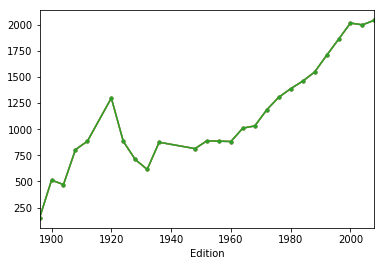

In [497]:
all_medals.plot(kind = 'line', marker = '.')
plt.show()

#### Grouping the data

In [501]:
france = medals.NOC == 'FRA'
france_grps = medals[france].groupby(['Edition','Medal'])
france_grps['Athlete'].count().head(10)

Edition  Medal 
1896     Bronze     2
         Gold       5
         Silver     4
1900     Bronze    53
         Gold      46
         Silver    86
1908     Bronze    21
         Gold       9
         Silver     5
1912     Bronze     5
Name: Athlete, dtype: int64

#### Reshaping the data
- matplotlib works best with one level indexes. 
- Though two or more level indxes are common with grouping operations

In [502]:
france_medals = france_grps['Athlete'].count().unstack()
france_medals.head(12)

Medal,Bronze,Gold,Silver
Edition,,,
1896,2.0,5.0,4.0
1900,53.0,46.0,86.0
1908,21.0,9.0,5.0
1912,5.0,10.0,10.0
1920,55.0,13.0,73.0
1924,20.0,39.0,63.0
1928,13.0,7.0,16.0
1932,6.0,23.0,8.0
1936,18.0,12.0,13.0


#### Plotting the result
- Distinct column will yield distinct lines in pandas plotting

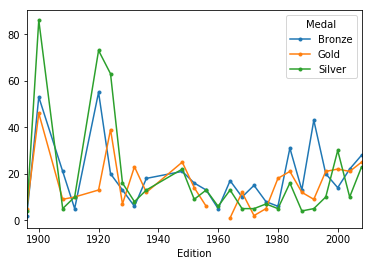

In [504]:
france_medals.plot(kind='line', marker='.')
plt.show()

### Visualizing USA Medal Counts by Edition: Line Plot

In [505]:
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [506]:
# Create the DataFrame: usa
usa = medals[medals['NOC'] == 'USA']

usa.head()

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition','Medal'])['Athlete'].count()

usa_medals_by_year.head(10)

Edition  Medal 
1896     Bronze      2
         Gold       11
         Silver      7
1900     Bronze     14
         Gold       27
         Silver     14
1904     Bronze    111
         Gold      146
         Silver    137
1908     Bronze     15
Name: Athlete, dtype: int64

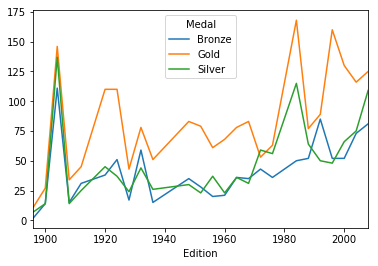

In [507]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level = 'Medal')

usa_medals_by_year.head()

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

### Visualizing USA Medal Counts by Edition: Area Plot

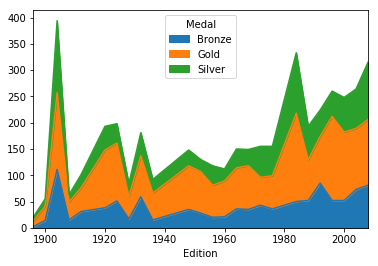

In [508]:
# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

### Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

In [509]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(
    values = medals.Medal,
    categories = ['Bronze','Silver','Gold'],
    ordered = True)
    
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null category
dtypes: category(1), int64(1), object(8)
memory usage: 2.0+ MB


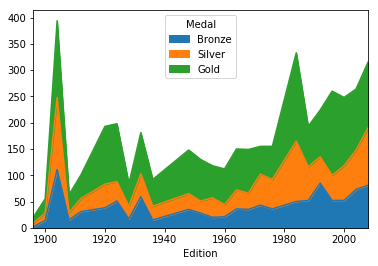

In [510]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

### Congratulations!